###Importing the libraries

In [352]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

###Import the dataset

In [353]:
def load_dataset(path):
  load = pd.read_csv(path)
  return load

dataset = load_dataset('/content/medical-charges.csv')

In [354]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [355]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


###Basic EDA

In [356]:
def info(dataset):
  information = dataset.info()
  return information

info(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [357]:
def basic_eda(values):
  eda = {}
  eda['Shape'] = values.shape
  eda['Describe'] = values.describe()
  eda['Null Values\n'] = values.isnull().sum()
  eda['Duplicate Values'] = values.duplicated().sum()
  eda['object type\n'] = values.dtypes
  return eda

EDA = basic_eda(dataset)
for i in EDA:
  print(i, EDA[i])
  print('-'*50)

Shape (1338, 7)
--------------------------------------------------
Describe                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
--------------------------------------------------
Null Values
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
--------------------------------------------------
Duplicate Values 1
--------------------------------------------------
object type
 age           int64
sex          object
bmi         float64
children      int64
smok

In [358]:
def rem_dup(value):
  original = value.duplicated().sum()
  dups = value.drop_duplicates()
  print(f'total dups {original}')
  print(f'dups removed {original}')
  print(f'total dupilicates {dups.duplicated().sum()}')
  return dups

dataset = rem_dup(dataset)

total dups 1
dups removed 1
total dupilicates 0


In [359]:
def numeric_values(values):
  num_col = dataset.select_dtypes(include='number').columns
  for i in num_col:
    print(f'{i}')
  return num_col

num_cols = numeric_values(dataset)

age
bmi
children
charges


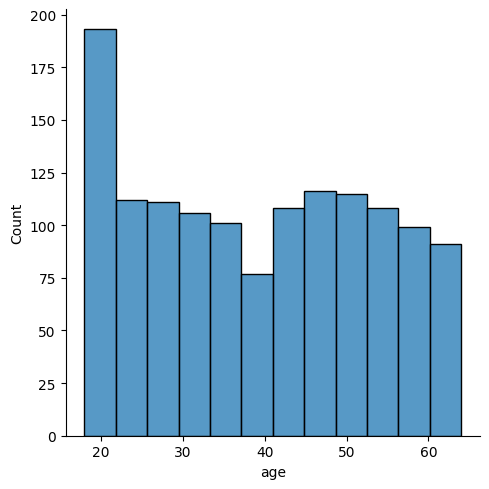

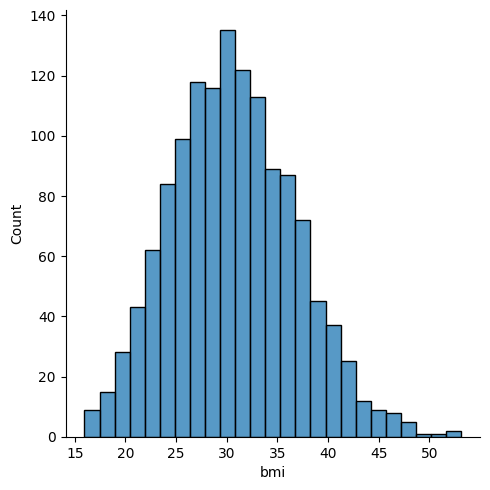

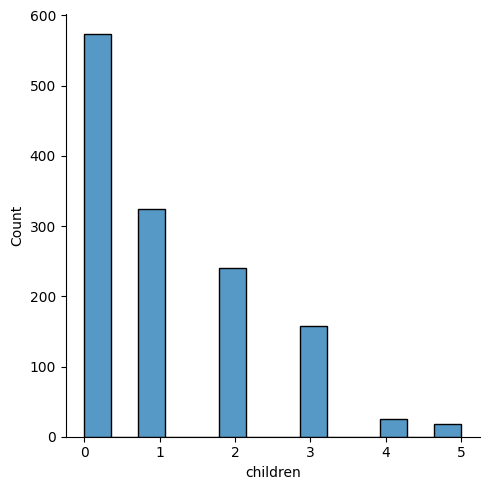

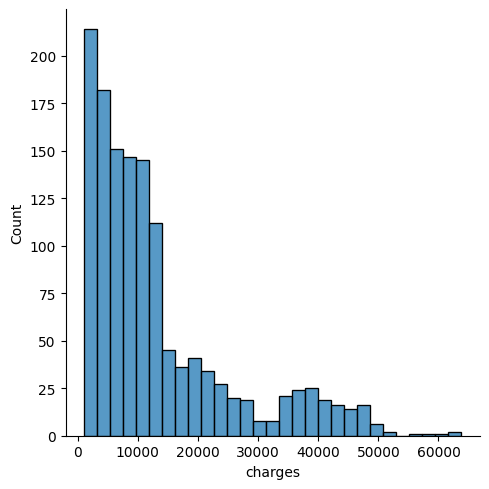

In [360]:
def feature_distribution_of_num(df, columns):
  for col in columns:
    sns.displot(df[col])
    plt.show()

feature_distribution_of_num(dataset, num_cols)

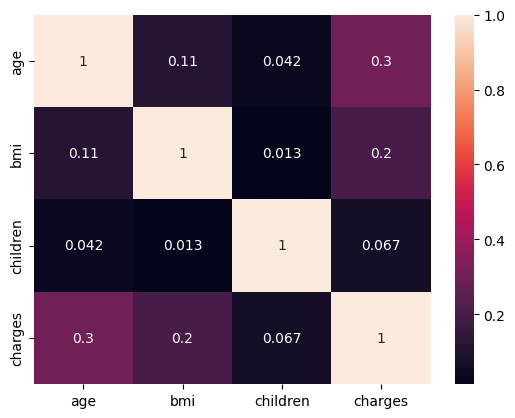

In [361]:
sns.heatmap(dataset[num_cols].corr(), annot=True)
plt.show()

In [362]:
def categorical_values(values):
  cat_col = dataset.select_dtypes(include='object').columns
  return cat_col

cat_cols = categorical_values(dataset)
print(cat_cols)

Index(['sex', 'smoker', 'region'], dtype='object')


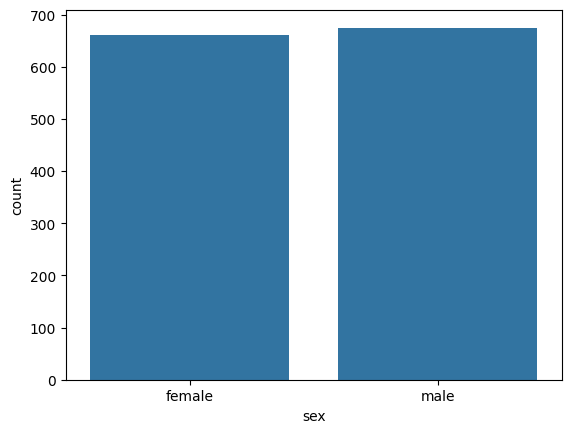

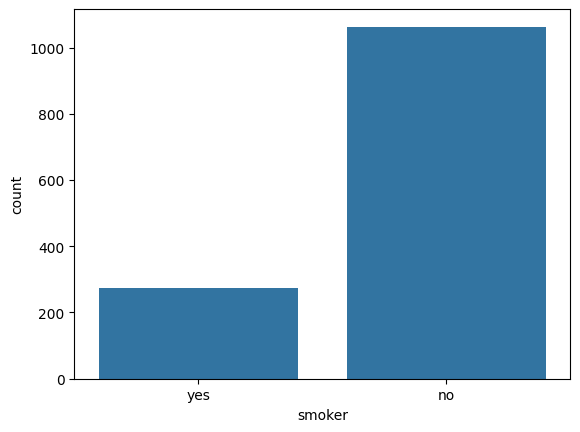

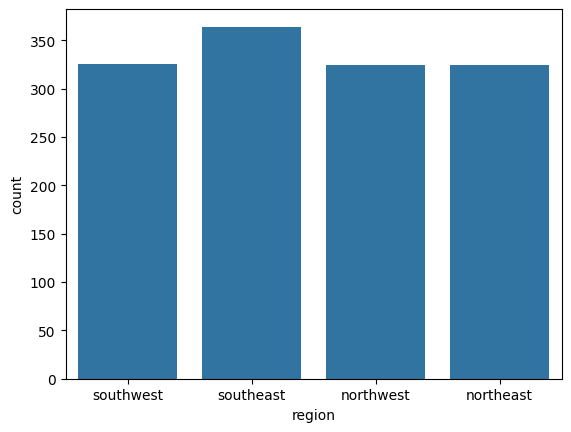

In [363]:
def categorical_countplot(df, columns):
  for col in columns:
    sns.countplot(data=df, x=col)
    plt.show()

categorical_countplot(dataset, cat_cols)

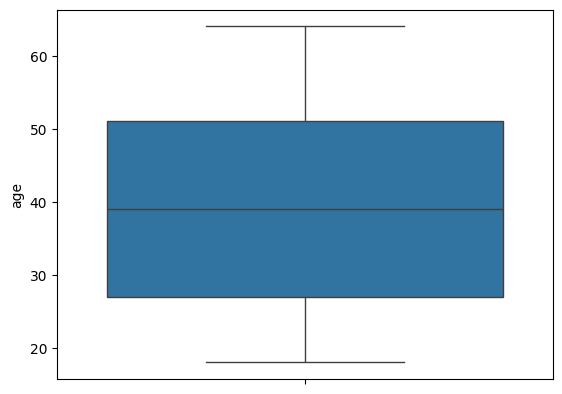

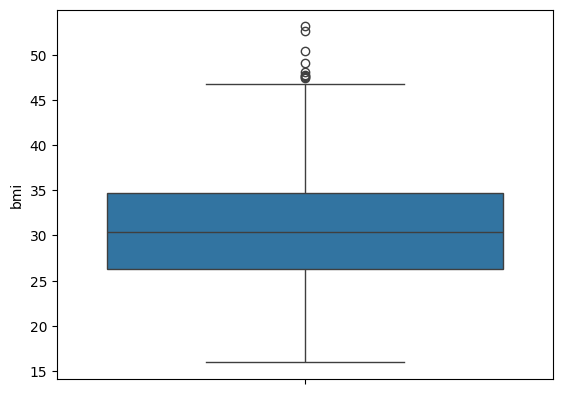

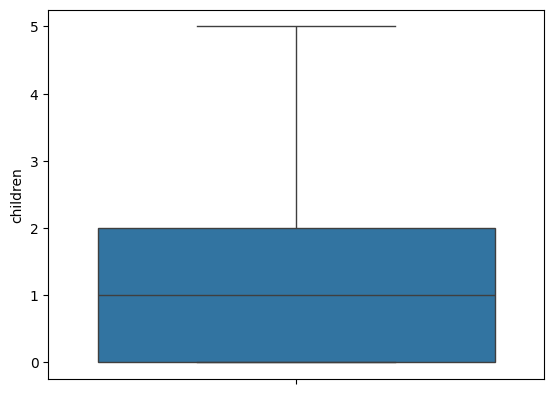

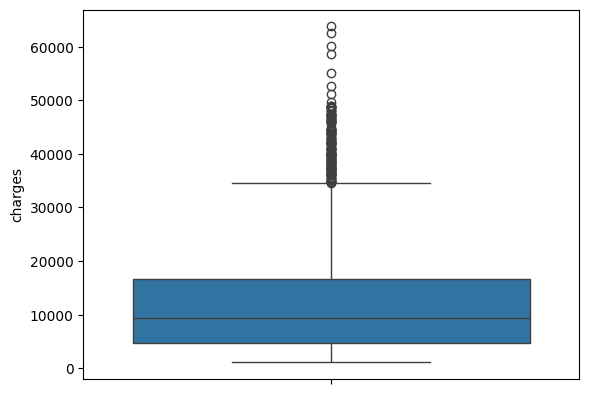

In [364]:
def outlayers(values):
  for i in values:
    sns.boxplot(values[i])
    plt.show()

out_layers = outlayers(dataset[num_cols])

###Features and target

In [365]:
x = dataset.drop('charges', axis=1)
y = dataset['charges']

In [366]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [367]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


###Split the data

In [368]:
from sklearn.model_selection import train_test_split
def split(x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  print('Split done!')
  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split(x, y)

Split done!


In [369]:
x_train

,age,sex,bmi,children,smoker,region
1114,23,male,24.510,0,no,northeast
968,21,male,25.745,2,no,northeast
599,52,female,37.525,2,no,northwest
170,63,male,41.470,0,no,southeast
275,47,female,26.600,2,no,northeast
...,...,...,...,...,...,...
1096,51,female,34.960,2,yes,northeast
1131,27,male,45.900,2,no,southwest
1295,20,male,22.000,1,no,southwest
861,38,female,28.000,3,no,southwest


In [370]:
x_test

,age,sex,bmi,children,smoker,region
900,49,male,22.515,0,no,northeast
1064,29,female,25.600,4,no,southwest
1256,51,female,36.385,3,no,northwest
298,31,male,34.390,3,yes,northwest
237,31,male,38.390,2,no,southeast
...,...,...,...,...,...,...
534,64,male,40.480,0,no,southeast
542,63,female,36.300,0,no,southeast
760,22,female,34.580,2,no,northeast
1284,61,male,36.300,1,yes,southwest


In [371]:
y_train

,charges
1114,2396.09590
968,3279.86855
599,33471.97189
170,13405.39030
275,9715.84100
...,...
1096,44641.19740
1131,3693.42800
1295,1964.78000
861,7151.09200


In [372]:
y_test

,charges
900,8688.85885
1064,5708.86700
1256,11436.73815
298,38746.35510
237,4463.20510
...,...
534,13831.11520
542,13887.20400
760,3925.75820
1284,47403.88000


###Encode the categorical values

In [373]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [392]:
for i in cat_cols:
  print(i, x[i].unique())

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


In [375]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
def encode(ct, x_train, x_test):
  one_hot_columns = []
  for col in cat_cols:
    if dataset[col].nunique() >= 2:
      one_hot_columns.append(col)
  print(f"The columns to be one-hot encoded: {one_hot_columns}")

  ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(), one_hot_columns)], remainder='passthrough')
  x_train = ct.fit_transform(x_train)
  print('x_train encode done!')
  x_test = ct.transform(x_test)
  print('x_test encode done!')
  return ct, x_train, x_test

ct, x_train, x_test = encode(cat_cols, x_train, x_test)

The columns to be one-hot encoded: ['sex', 'smoker', 'region']
x_train encode done!
x_test encode done!


###Feature scaling

In [376]:
from sklearn.preprocessing import StandardScaler
def feature_scale(x_train, x_test):
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test)
  return sc, x_train, x_test

sc, x_train, x_test = feature_scale(x_train, x_test)

###Model training

In [377]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [378]:
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(kernel="rbf"),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=10),
    "Decision Tree Regressor": DecisionTreeRegressor(criterion='squared_error',random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [379]:
def train_model(models, x_train, y_train):
  training_models = {}
  for model_name, model in models.items():
    print(f'Training {model_name}...')
    training = model.fit(x_train, y_train)
    training_models[model_name] = training
    print(training_models)
    print(f'{model_name} trained!')
    print('-'*50)
  return training_models

train_completed_models = train_model(models, x_train, y_train)

Training Linear Regression...
{'Linear Regression': LinearRegression()}
Linear Regression trained!
--------------------------------------------------
Training Support Vector Regression...
{'Linear Regression': LinearRegression(), 'Support Vector Regression': SVR()}
Support Vector Regression trained!
--------------------------------------------------
Training KNN Regressor...
{'Linear Regression': LinearRegression(), 'Support Vector Regression': SVR(), 'KNN Regressor': KNeighborsRegressor(n_neighbors=10)}
KNN Regressor trained!
--------------------------------------------------
Training Decision Tree Regressor...
{'Linear Regression': LinearRegression(), 'Support Vector Regression': SVR(), 'KNN Regressor': KNeighborsRegressor(n_neighbors=10), 'Decision Tree Regressor': DecisionTreeRegressor(random_state=42)}
Decision Tree Regressor trained!
--------------------------------------------------
Training Random Forest Regressor...
{'Linear Regression': LinearRegression(), 'Support Vector Reg

In [380]:
def test_model(models, x_test):
  testing_models = {}
  for model_name, model in models.items():
    print(f'Testing {model_name}...')
    testing = model.predict(x_test)
    testing_models[model_name] = testing
    print(testing_models)
    print(f'{model_name} tested!')
    print('-'*50)
  return testing_models

test_completed_models = test_model(train_completed_models, x_test)

Testing Linear Regression...
{'Linear Regression': array([ 8.14369388e+03,  5.73711568e+03,  1.43693149e+04,  3.17455136e+04,
        8.96238666e+03,  1.31497224e+04,  3.04467607e+04,  1.45328881e+03,
        1.06330184e+04,  1.13189438e+04,  1.03778536e+04,  3.31184377e+04,
        3.10772527e+04,  1.74119253e+04,  1.08016743e+04,  9.52889964e+03,
        4.16103784e+03,  3.17315373e+04,  3.21938875e+03,  5.22992460e+03,
        3.54979004e+03,  3.02837740e+04,  1.48989509e+04,  3.04569093e+04,
        3.11077668e+04,  5.51196081e+03,  3.55030401e+04,  3.65704810e+04,
        1.14123133e+04,  1.42056990e+04,  6.50234029e+03,  1.27246945e+04,
        3.99806590e+02,  1.20883980e+04,  3.96592069e+04,  1.23395540e+04,
        4.74412279e+03,  3.91903157e+03,  3.08606789e+04,  8.95870663e+03,
        7.05389441e+03,  3.01125636e+04,  3.47804324e+04,  1.22916189e+04,
        7.35739310e+03,  3.42060530e+03,  6.21243471e+03,  8.98345200e+03,
        4.26401828e+03,  9.01992870e+03,  6.60149

In [381]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def train_evaluation(trained_models, x_train, y_train):
  train_evaluation = {}
  for model_name, model in trained_models.items():
    y_train_pred = model.predict(x_train)

    train_evaluation[model_name] = {
        'R2 Score': r2_score(y_train, y_train_pred),
        'Mean Absolute Error': mean_absolute_error(y_train, y_train_pred),
        'Mean Squared Error': mean_squared_error(y_train, y_train_pred)
    }

  return train_evaluation

completed_train_evaluation = train_evaluation(train_completed_models, x_train, y_train)
for i in completed_train_evaluation:
  print(i, completed_train_evaluation[i])
  print('-'*50)

Linear Regression {'R2 Score': 0.7299057809339075, 'Mean Absolute Error': 4181.901537775148, 'Mean Squared Error': 36979860.90472867}
--------------------------------------------------
Support Vector Regression {'R2 Score': -0.09696245314661289, 'Mean Absolute Error': 8086.751999274218, 'Mean Squared Error': 150190252.40649533}
--------------------------------------------------
KNN Regressor {'R2 Score': 0.8124723481286964, 'Mean Absolute Error': 3179.1507135799816, 'Mean Squared Error': 25675286.594320785}
--------------------------------------------------
Decision Tree Regressor {'R2 Score': 1.0, 'Mean Absolute Error': 0.0, 'Mean Squared Error': 0.0}
--------------------------------------------------
Random Forest Regressor {'R2 Score': 0.9743085540168025, 'Mean Absolute Error': 1037.7069147589339, 'Mean Squared Error': 3517535.8516929653}
--------------------------------------------------


In [382]:
def test_evaluation(test_completed_models, y_test):
  test_evaluation = {}
  for model_name, pred in test_completed_models.items():
    test_evaluation[model_name] = {
        'R2 Score': r2_score(y_test, pred),
        'Mean Absolute Error': mean_absolute_error(y_test, pred),
        'Mean Squared Error': mean_squared_error(y_test, pred)
    }
  return test_evaluation

completed_test_evaluation = test_evaluation(test_completed_models, y_test)
for i in completed_test_evaluation:
  print(i, completed_test_evaluation[i])
  print('-'*50)

Linear Regression {'R2 Score': 0.8069287081198011, 'Mean Absolute Error': 4177.045561036325, 'Mean Squared Error': 35478020.67523561}
--------------------------------------------------
Support Vector Regression {'R2 Score': -0.1302011907158933, 'Mean Absolute Error': 9263.554103634908, 'Mean Squared Error': 207681322.38051644}
--------------------------------------------------
KNN Regressor {'R2 Score': 0.8108226690086755, 'Mean Absolute Error': 3719.40408666791, 'Mean Squared Error': 34762481.74876607}
--------------------------------------------------
Decision Tree Regressor {'R2 Score': 0.7923523042215324, 'Mean Absolute Error': 2798.2915577574627, 'Mean Squared Error': 38156523.28345482}
--------------------------------------------------
Random Forest Regressor {'R2 Score': 0.8805516409004184, 'Mean Absolute Error': 2582.5207190242527, 'Mean Squared Error': 21949360.324306957}
--------------------------------------------------


###Overfit check

In [383]:
def overfit_check(train_completed_models, x_train, y_train, x_test, y_test):
  for model_name, model in train_completed_models.items():
    print(f'Checking overfit for {model_name}...')
    training_score = model.score(x_train, y_train)
    testing_score = model.score(x_test, y_test)
    print(f'Training Score: {training_score}')
    print(f'Testing Score: {testing_score}')
    gap = training_score - testing_score
    print(f'Gap: {gap}')
    if testing_score > training_score:
      print(f'{model_name} is good generalisation / mild underfitting')
    elif training_score <0.6 and testing_score <0.6:
      print(f'{model_name} is underfit!')
    elif gap <= 0.07:
      print(f'{model_name} is good fit!')
    elif gap <= 0.15:
      print(f'{model_name} is slightly overfit!')
    else:
      print(f'{model_name} is overfit!')
    print('-'*50)

overfit_check(train_completed_models, x_train, y_train, x_test, y_test)

Checking overfit for Linear Regression...
Training Score: 0.7299057809339075
Testing Score: 0.8069287081198011
Gap: -0.07702292718589365
Linear Regression is good generalisation / mild underfitting
--------------------------------------------------
Checking overfit for Support Vector Regression...
Training Score: -0.09696245314661289
Testing Score: -0.1302011907158933
Gap: 0.03323873756928042
Support Vector Regression is underfit!
--------------------------------------------------
Checking overfit for KNN Regressor...
Training Score: 0.8124723481286964
Testing Score: 0.8108226690086755
Gap: 0.0016496791200208971
KNN Regressor is good fit!
--------------------------------------------------
Checking overfit for Decision Tree Regressor...
Training Score: 1.0
Testing Score: 0.7923523042215324
Gap: 0.20764769577846764
Decision Tree Regressor is overfit!
--------------------------------------------------
Checking overfit for Random Forest Regressor...
Training Score: 0.9743085540168025
Testi

###Final model

In [384]:
knn_model = models['KNN Regressor']
knn_pred = knn_model.predict(x_test)

In [385]:
knn_pred

array([ 9758.205545,  7489.008673, 14248.114274, 29028.286329,
        8363.5677  ,  9560.557098, 35744.306588,  5205.237162,
        7780.62187 , 11345.898124, 13854.921117, 26467.12179 ,
       32674.683773, 11134.0924  ,  9358.424187,  8255.486084,
        4560.966533, 37297.71581 ,  3790.229384,  6227.146199,
        3110.757395, 27855.591883, 10854.697936, 31758.8169  ,
       28664.406073, 10290.226386, 38482.490831, 35191.4266  ,
       10003.035215, 10012.01496 ,  4078.29324 ,  8657.36528 ,
        3028.026088, 10241.2956  , 42049.725471,  9111.3684  ,
        8201.058573,  6676.80145 , 29064.776966,  7131.47255 ,
        6113.536911, 19956.620855, 43775.74678 ,  9330.897825,
        8781.08022 ,  5722.847662,  6058.513006,  8616.82413 ,
        3934.64363 ,  7947.050538,  5396.509359,  8662.228744,
       20983.29941 ,  3236.380841,  7909.4808  ,  9204.044538,
        9959.62844 ,  4502.665745, 35953.73675 ,  6727.98559 ,
       15700.168218,  6997.396319, 13091.161714,  1982.

###Cross validation

In [386]:
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(estimator = knn_model, X = x_train, y = y_train, cv = 10, scoring="r2")
print(f"Cross-validated R2 scores: {r2_scores}")
print(f"Mean R2: {r2_scores.mean():.3f}")
print(f"Std R2: {r2_scores.std():.3f}")

Cross-validated R2 scores: [0.75246703 0.76988793 0.77329806 0.77173536 0.74143399 0.76395961
 0.67844133 0.81648523 0.76692335 0.76066452]
Mean R2: 0.760
Std R2: 0.033


###Accuracy

In [387]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score = round(r2_score(y_test, knn_pred),2)*100
mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)

print(f"R2 Score: {r2_score}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R2 Score: 81.0
Mean Absolute Error: 3719.40408666791
Mean Squared Error: 34762481.74876607


#MEDICAL INSURANCE PREDICTION

In [393]:
age = int(input("Enter your age: "))
sex = input("Enter your sex (male/female): ").lower()
bmi = float(input("Enter your bmi: "))
children = int(input("Enter your children:(0,1,2,3 etc) "))
smoker = input("Enter your smoker (yes/no): ").lower()
region = input("Enter your region:('southwest' 'southeast' 'northwest' 'northeast') ").lower()

user_input = pd.DataFrame({
    'age': [age],
    'sex': [sex],
    'bmi': [bmi],
    'children': [children],
    'smoker': [smoker],
    'region': [region]
})

encoding = ct.transform(user_input)
scaling = sc.transform(encoding)

prediction = knn_model.predict(scaling)

print(f"Predicted charges: {prediction[0]}")

Enter your age: 58
Enter your sex (male/female): female
Enter your bmi: 125
Enter your children:(0,1,2,3 etc) 2
Enter your smoker (yes/no): no
Enter your region:('southwest' 'southeast' 'northwest' 'northeast') northeast
Predicted charges: 11651.661535
